Daten aus Dateien einlesen, erste 1000 Werte überspringen
Mittelwert und die Standardabweichung berechnen.
Vergleich der Ergebnisse mit den Werten aus der gemessenen Tabelle. (Protokoll Versuch 1.txt)

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

# get current working directory
path = os.getenv('DATA_PATH')
if not path:
    raise ValueError("DATA_PATH environment variable is not set")

# Replace the German decimal comma with a dot and remove separators
converters = {i: lambda s: float(s.decode().replace(',', '.')) for i in range(2)}

mean_list = []  # list to store the mean of the data from each file
std_list = []  # list to store the standard deviation of the data from each file
for i in range(10, 71, 3):
    csv_data = np.genfromtxt(f"{path}\\Versuch1_Messungen\\V1_{i}.csv", delimiter=";", skip_header=1000, skip_footer=1, dtype=float, converters=converters)

    # Write only voltage in array
    voltage_data = csv_data[:, 1]

    # get the mean of the data
    mean = np.mean(voltage_data, axis=0)
    print(f"{i} {mean}")
    # get the standard deviation of the data
    std = np.std(voltage_data, axis=0, ddof=1)
    # Standardabweichung 
    # print(f"{i} {std}")
    mean_list.append(mean)
    std_list.append(std)

10 1.348606293778899
13 1.188338332240437
16 1.0593454600861705
19 0.9422708880128206
22 0.8682159075662046
25 0.8056663341288358
28 0.7491368855590583
31 0.6904930504592267
34 0.6511101496920977
37 0.6298625915531737
40 0.5952422504529212
43 0.5538551747078603
46 0.5353349117349725
49 0.516292314482976
52 0.4767991058984868
55 0.4582667302280369
58 0.4396033265079865
61 0.43869589409205534
64 0.41796839935477076
67 0.41720390158575016
70 0.3973853027448507


Grafische Darstellung der gefundenen Übertragungsfunktion bzw. Kennlinie.

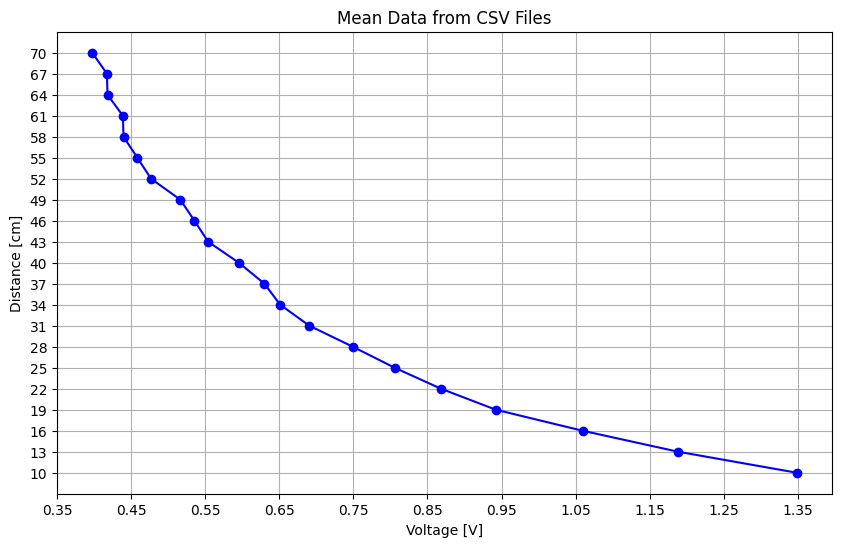

In [2]:
# plot the mean data with matplotlib
# Create a plot
distance = np.array(range(10, 71, 3))

plt.figure(figsize=(10, 6))
plt.plot(mean_list,distance , marker='o', linestyle='-', color='b')
plt.title('Mean Data from CSV Files')
plt.xlabel('Voltage [V]')
plt.ylabel('Distance [cm]')
plt.xticks(np.arange(0.35, 1.4, 0.1))  # Set x-ticks to match column indices
plt.yticks(distance)  # Set y-ticks
plt.grid(True)
plt.show()

 2. Modellierung der Kennlinie durch lineare Regression

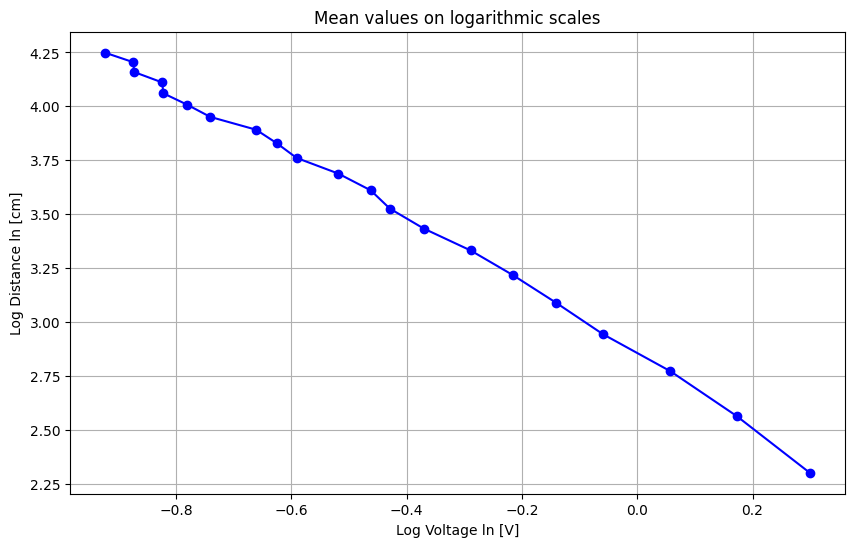

In [3]:
log_distance = np.log(distance)
log_mean = np.log(mean_list)
# plot the log data with matplotlib

plt.figure(figsize=(10, 6))
plt.plot(log_mean, log_distance, marker='o', linestyle='-', color='b')
plt.title('Mean values on logarithmic scales')
plt.xlabel('Log Voltage ln [V]')
plt.ylabel('Log Distance ln [cm]')
plt.grid(True)
plt.show()
    

3. Berechnung der Ausgleichsgerade mithilfe der linearen Regression.

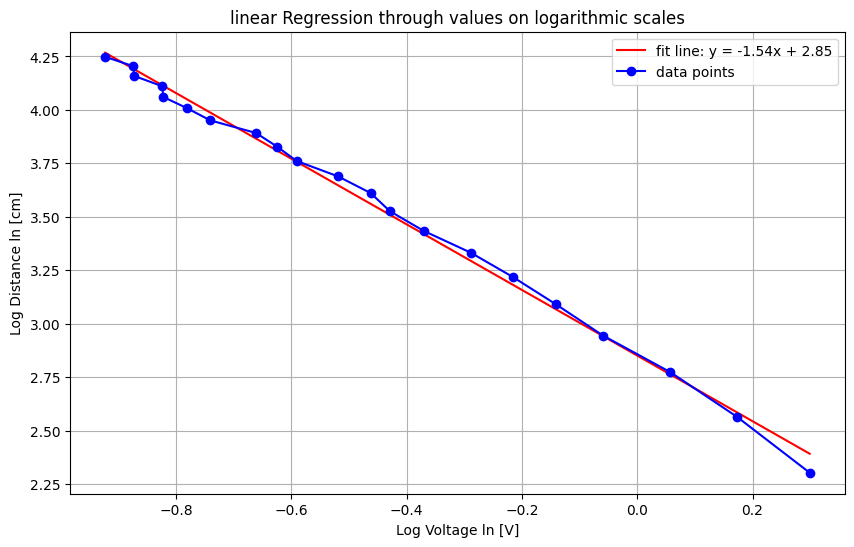

In [4]:
numerator = 0
denominator = 0
for i in range(len(log_mean)):
    numerator += (log_mean[i] - np.mean(log_mean)) * (log_distance[i] - np.mean(log_distance))
    denominator += (log_mean[i] - np.mean(log_mean)) ** 2
    
a = numerator / denominator
b = np.mean(log_distance) - a * np.mean(log_mean)

regression = a * log_mean + b

# Create a plot
plt.figure(figsize=(10, 6))
# Calculate the corresponding y-values for the line y = a * x + b
# Plot the regression line
plt.plot(log_mean, regression, color='r', label=f'fit line: y = {a:.2f}x + {b:.2f}')

# plot the log data with matplotlib

plt.plot(log_mean, log_distance, marker='o', linestyle='-', color='b', label='data points')
plt.title('linear Regression through values on logarithmic scales')
plt.xlabel('Log Voltage ln [V]')
plt.ylabel('Log Distance ln [cm]')
plt.grid(True)
plt.legend( )
plt.show()

 Die Rückrechnung auf den ursprünglichen Zusammenhang geschieht über die Umkehrung
 der doppelten Logarithmierung: y=exp(a·lnx+b)
 wobei x hier die Spannungsmessung und y die daraus resultierende Abstandsmessung darstellt.
 Damit haben wir die nichtlineare Kennlinie des Sensors gefunden.

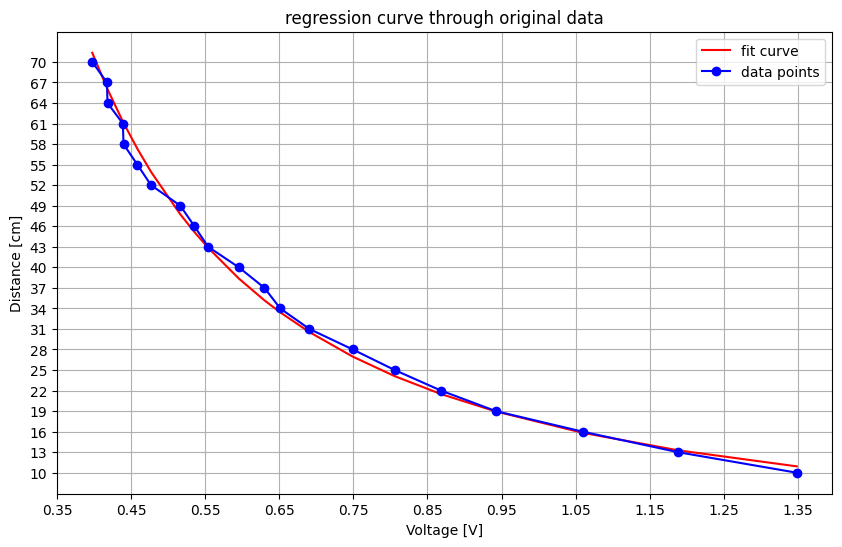

In [5]:
# Calculate the original relation
regression_curve = np.exp(a * log_mean + b)

# plot the mean data with matplotlib
plt.figure(figsize=(10, 6))

plt.plot(mean_list, regression_curve, color='r', label='fit curve')

# original plot
plt.plot(mean_list, distance, marker='o', linestyle='-', color='b', label='data points')
plt.title('regression curve through original data')
plt.xlabel('Voltage [V]')
plt.ylabel('Distance [cm]')
plt.xticks(np.arange(0.35, 1.4, 0.1))  # Set y-ticks
plt.yticks(distance)  # Set x-ticks to match column indices
plt.grid(True)
plt.legend()
plt.show()

 3. Flächenmessung mit Fehlerrechnung
 a. Ermittlung des Messfehlers des Abstandsmessers.
Durch die Kennlinie wird der Abstand nicht direkt ermittelt, sondern
indirekt über eine Spannungsmessung. 
Ermittlung des Messfehlers: Berechnung der Fehlerfortpflanzung durch die Kennlinie e^b * x^a.

Vorgehensweise:
    Messfehlerschätzung: Korrektur der Standardabweichung um 1/Wurzel(n) aufgrund der Anzahl der Messungen.
    Angabe des Ergebnisses der Spannungsmessung in der korrekten Form.
    Vertrauensbereich für eine Sicherheit von 68% und 95%.

In [6]:
import math

# Read A4 length data
csv_data = np.genfromtxt(f"{path}\\V1_A4_29_7.csv", delimiter=";", skip_header=1000, skip_footer=1, dtype=float, converters=converters)

# Write only voltage in array
voltage_data = csv_data[:, 1]
# calculate mean
mean_voltage_long_a4 = np.mean(voltage_data, axis=0)
print(f"Mean Voltage = {mean_voltage_long_a4}")
# calculate standard deviation
std_long_a4 = np.std(voltage_data, axis=0, ddof=1)
print(f"Standard Deviation = {std_long_a4}")

# Correct indication of the measurement result
from sympy import exp, log

derivative_distance = a * exp(a * log(mean_voltage_long_a4) + b)
print(f"Derivative Distance = {derivative_distance}")
# Correct the standard deviation for the number of measurements
delta_voltage_long_a4 = std_long_a4 / math.sqrt(len(voltage_data))
print(f"Delta Voltage = {delta_voltage_long_a4}")
delta_distance_long_a4 = abs(derivative_distance * delta_voltage_long_a4)
print(f"Delta Distance = {delta_distance_long_a4}")

# Calculate the distance
distance_long_a4 = exp(a * log(mean_voltage_long_a4) + b)
print("68%")
print("\033[1mDistance =", round(distance_long_a4, 3), "±", round(delta_distance_long_a4, 3), "cm\033[0m\n")

delta_voltage_long_a4_95 = delta_voltage_long_a4 * 2.0
print(f"Delta Voltage = {delta_voltage_long_a4}")
delta_distance_long_a4_95 = abs(derivative_distance * delta_voltage_long_a4_95)
print(f"Delta Distance = {delta_distance_long_a4_95}")
distance_long_a4 = exp(a * log(mean_voltage_long_a4) + b)
print("95%")
print("\033[1mDistance =", round(distance_long_a4, 3), "±", round(delta_distance_long_a4_95, 3), "cm\033[0m")


FileNotFoundError: C:\SSS\SSS_aufgaben\V1_A4_29_7.csv not found.

 b. Flächenmessung:
 Berechnung der Schätzung für die Fläche des Blattes und korrekte Angabe des Messergebnisses mit
 Schätzung des Messfehlers. Anwendung des Gaußschen Fehlerfortpflanzungsgesetz.

In [ ]:
# Read A4 width data
csv_data = np.genfromtxt(f"{path}\\V1_A4_21.csv", delimiter=";", skip_header=1000, skip_footer=1, dtype=float, converters=converters)

# Write only voltage in array
voltage_data = csv_data[:, 1]
# calculate mean
mean_voltage_short_a4 = np.mean(voltage_data, axis=0)
print(f"Mean Voltage = {mean_voltage_short_a4}")
# calculate standard deviation
std_short_a4 = np.std(voltage_data, axis=0, ddof=1)
print(f"Standard Deviation = {std_short_a4}")

# Correct indication of the measurement result
derivative_distance_short = a * exp(a * log(mean_voltage_short_a4) + b)
print(f"Derivative Distance = {derivative_distance_short}")
delta_voltage_short_a4 = std_short_a4 / math.sqrt(len(voltage_data))
print(f"Delta Voltage = {delta_voltage_short_a4}")
delta_distance_short_a4 = abs(derivative_distance_short * delta_voltage_short_a4)
print(f"Delta Distance = {delta_distance_short_a4}")

# Calculate the distance
distance_short_a4 = exp(a * log(mean_voltage_short_a4) + b)
print("\n\033[1mDistance =", round(distance_short_a4, 3), "±", round(delta_distance_short_a4, 3), "cm\033[0m")


Partielle Ableitungen und Fehlerfortpflanzung
Fläche: A = f(a, b) = a · b mit der gemessenen langen Seite des A4 Blattes a und kurzen Seite b und
den zugehörigen Messunsicherheiten ∆a und ∆b.

In [ ]:
# Fehlerfortpflanzung
delta_area = math.sqrt( (distance_short_a4 * delta_distance_long_a4)**2 + (distance_long_a4 * delta_distance_short_a4)**2 )
print("delta area = ", delta_area)

area = distance_long_a4 * distance_short_a4

print("\n\033[1mArea =", round(area, 2), "±", round(delta_area, 2), "cm\u00b2\033[0m")